<a href="https://colab.research.google.com/github/mnylah/Quantitative-Neuroscience/blob/master/Parametric_correlation_coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

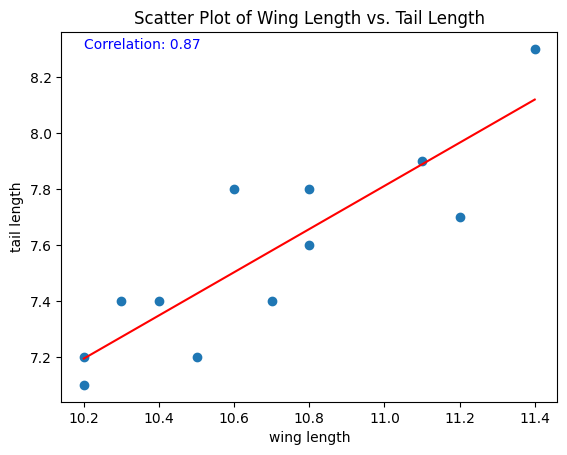

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these lines with your actual x and y values
x = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]


# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("wing length")
plt.ylabel("tail length")
plt.title("Scatter Plot of Wing Length vs. Tail Length")

# Add the correlation value to the plot
plt.text(min(x), max(y), f'Correlation: {correlation_value:.2f}', fontsize=10, color='blue')

# Add the line of best fit to the scatter plot
plt.plot(x_line, y_line, color='red')

# Show the combined plot
plt.show()



In [ ]:
correlation_matrix = np.corrcoef(x, y)
correlation_value = correlation_matrix[0, 1]

slope, intercept = np.polyfit(x, y, 1)

In [ ]:
# Manual Calculation

n = len(x)
sum_xy = sum([xi * yi for xi, yi in zip(x, y)])
sum_x = sum(x)
sum_y = sum(y)
sum_x_squared = sum([xi**2 for xi in x])
sum_y_squared = sum([yi**2 for yi in y])
mean_x = sum_x / n
mean_y = sum_y / n

# Calculate correlation coefficient (r)
numerator_r = n * sum_xy - (sum_x * sum_y)
denominator_r = ((n * sum_x_squared - sum_x**2) * (n * sum_y_squared - sum_y**2))**0.5
manual_correlation_value = numerator_r / denominator_r

# Calculate slope (m)
numerator_m = n * sum_xy - (sum_x * sum_y)
denominator_m = n * sum_x_squared - sum_x**2
manual_slope = numerator_m / denominator_m

# Calculate intercept (b)
manual_intercept = mean_y - manual_slope * mean_x

print(f"Manual Correlation Coefficient: {manual_correlation_value:.4f}")
print(f"Manual Slope: {manual_slope:.4f}")
print(f"Manual Intercept: {manual_intercept:.4f}")

Manual Correlation Coefficient: 0.8704
Manual Slope: 0.7709
Manual Intercept: -0.6688


In [ ]:
# NumPy Calculation

correlation_matrix = np.corrcoef(x, y)
numpy_correlation_value = correlation_matrix[0, 1]

numpy_slope, numpy_intercept = np.polyfit(x, y, 1)

print(f"NumPy Correlation Coefficient: {numpy_correlation_value:.4f}")
print(f"NumPy Slope: {numpy_slope:.4f}")
print(f"NumPy Intercept: {numpy_intercept:.4f}")

NumPy Correlation Coefficient: 0.8704
NumPy Slope: 0.7709
NumPy Intercept: -0.6688


The results from both manual calculation and NumPy functions should be very close, demonstrating the correctness of the calculations.

The standard error of the correlation coefficient provides a measure of the variability of the sample correlation coefficient. The 95% confidence interval gives a range within which the true population correlation coefficient is likely to fall 95% of the time.

In [ ]:
import scipy.stats as stats

# Calculate the standard error of the correlation coefficient
# The formula for the standard error of r is SE = sqrt((1 - r^2) / (n - 2))
standard_error_r = np.sqrt((1 - numpy_correlation_value**2) / (n - 2))

# Calculate the 95% confidence interval for r
# We use Fisher's r-to-z transformation for the confidence interval
z = np.arctanh(numpy_correlation_value)
se_z = 1/np.sqrt(n-3)
alpha = 0.05 # 95% confidence interval
z_critical = stats.norm.ppf(1 - alpha/2)

lower_z = z - z_critical * se_z
upper_z = z + z_critical * se_z

lower_r = np.tanh(lower_z)
upper_r = np.tanh(upper_z)


print(f"Standard Error of r: {standard_error_r:.4f}")
print(f"95% Confidence Interval for r: ({lower_r:.4f}, {upper_r:.4f})")

Standard Error of r: 0.1557
95% Confidence Interval for r: (0.5923, 0.9632)


In [ ]:
# Perform a hypothesis test for the correlation coefficient
# We will use the t-distribution for this test
t_statistic = numpy_correlation_value * np.sqrt((n - 2) / (1 - numpy_correlation_value**2))
degrees_of_freedom = n - 2

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), degrees_of_freedom))

print(f"T-statistic: {t_statistic:.4f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"P-value: {p_value:.4f}")

# Check for significance at p < 0.05
alpha = 0.05
if p_value < alpha:
    print("The correlation coefficient is statistically significant at the p < 0.05 level.")
else:
    print("The correlation coefficient is not statistically significant at the p < 0.05 level.")

T-statistic: 5.5893
Degrees of Freedom: 10
P-value: 0.0002
The correlation coefficient is statistically significant at the p < 0.05 level.


Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate H0: r=0.75?

In [ ]:
# Hypothesis test for H0: r = 0.75

# We need to transform both correlation values using Fisher's r-to-z transformation
r_observed_z = np.arctanh(numpy_correlation_value)
r_hypothesized_z = np.arctanh(0.75)

# Calculate the standard error of the difference between the two z-values
# Assuming independent samples, the standard error of the difference is sqrt(SE_z1^2 + SE_z2^2)
# In this case, we are comparing our sample r to a hypothesized population r, so the standard error is just SE_z
se_z = 1/np.sqrt(n-3)

# Calculate the test statistic (z-score)
z_test_statistic = (r_observed_z - r_hypothesized_z) / se_z

# Calculate the p-value for a two-tailed test
p_value_h0_75 = 2 * (1 - stats.norm.cdf(np.abs(z_test_statistic)))

print(f"Observed r (yours): {numpy_correlation_value:.4f}")
print(f"Hypothesized r (Yale's): {0.75:.4f}")
print(f"Z-test statistic: {z_test_statistic:.4f}")
print(f"P-value (H0: r=0.75): {p_value_h0_75:.4f}")

# Check for significance at p < 0.05
alpha = 0.05
if p_value_h0_75 < alpha:
    print("We reject the null hypothesis. Your correlation value is significantly different from 0.75 at the p < 0.05 level.")
else:
    print("We fail to reject the null hypothesis. Your correlation value is not significantly different from 0.75 at the p < 0.05 level.")

Observed r (yours): 0.8704
Hypothesized r (Yale's): 0.7500
Z-test statistic: 1.0848
P-value (H0: r=0.75): 0.2780
We fail to reject the null hypothesis. Your correlation value is not significantly different from 0.75 at the p < 0.05 level.


In [ ]:
# --- Parameters for Power Analysis ---
rho_null = 0.0  # Null hypothesis correlation (H0: r = 0)
rho_alt = 0.5   # Alternative hypothesis correlation (H1: r >= 0.5)
alpha = 0.05    # Significance level
power_target = 0.80 # Desired power
alternative_hyp = 'greater' # One-tailed test (since H1: r >= 0.5)

print("--- Parameters ---")
print(f"Null Hypothesis Correlation (rho_0): {rho_null}")
print(f"Alternative Hypothesis Correlation (rho_1): {rho_alt}")
print(f"Significance Level (alpha): {alpha}")
print(f"Desired Power: {power_target}")
print(f"Alternative Hypothesis: {alternative_hyp}\n")

# --- 1. Calculate Sample Size needed for desired Power ---
# pingouin.power_corr can calculate sample size, power, or correlation
# by setting the unknown parameter to None.
print("--- Sample Size Calculation ---")
n_calculated = pg.power_corr(r=rho_alt, power=power_target, alpha=alpha,
                             alternative=alternative_hyp, n=None)
print(f"Required sample size for {power_target*100}% power: {np.ceil(n_calculated):.0f}\n")


# --- 2. Calculate Statistical Power for a given Sample Size (e.g., the calculated n) ---
print("--- Power Calculation (for calculated sample size) ---")
# Let's use the ceiling of our calculated n
n_for_power = int(np.ceil(n_calculated))
power_achieved = pg.power_corr(r=rho_alt, n=n_for_power, alpha=alpha,
                               alternative=alternative_hyp, power=None)
print(f"Achieved power with n={n_for_power}: {power_achieved:.3f}\n")


--- Parameters ---
Null Hypothesis Correlation (rho_0): 0.0
Alternative Hypothesis Correlation (rho_1): 0.5
Significance Level (alpha): 0.05
Desired Power: 0.8
Alternative Hypothesis: greater

--- Sample Size Calculation ---
Required sample size for 80.0% power: 23

--- Power Calculation (for calculated sample size) ---
Achieved power with n=23: 0.807



In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg

In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg